In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re

In [ ]:
df = pd.read_csv('/content/mental_health_data.csv')
df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [ ]:
df.shape

(10392, 3)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
posts,1
predicted,0
intensity,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
posts,0
predicted,0
intensity,0


In [ ]:
df.loc[3, 'posts']

'from one of my health group subject wayne dyer leukemia in case anyone here is not aware wayne have announce that he have chronic lymphocytic leukemia he is being see by an oncologist at the deepak chopra center just think I would send in case anyone would like to send he healing or contribute to his wellness blessing trish wayne dyer reveal that he have leukemia a couple of week ago motivational speaker and author dr wayne dyer state on his radio show excuse begone that he have some thing go on in his body he do not elaborate on it at that time however early today during dr dyers program on hay house radio a caller reference the aforementione comment this time dyer provide some detail behind his health situation dyer state that he have chronic lymphocytic leukemia cll which he say is not life threaten for he while many people would certainly fear this type of news dr dyer appear nonplussed state that he is totally confident and at peace with it he will be spend some time at the chopr

In [ ]:
df.loc[23, 'posts']

'I am a new member and hope to find some support in deal with depression and anxiety I am a single parent and one of my child have leukemia so thing have been really rough lately it is difficult for I to go anywhere with my son being sick so I hope I can find someone to talk to when I can not get away'

In [ ]:
df.loc[221, 'posts']

'so lady gaga is raise awareness for hiv aids is anyone else confuse about all of this raise awareness crap how many time have we hear of someone raise awareness for cancer leukemia aid and so on I know there was stigma around these disease before but now not so much yet there is still so much stigma around being a woman who have have a miscarriage nobody raise awareness for mother who have suffer miscarriage I know a few of we have been talk about this I think were on a very good track to being hear there are ton more resource for we than there ever was before I guess right now I am just at a loss I make my charity make my video my blog I may make another one soon but where do we go from here do we start write politician and celebrity in hope that our cause will be hear one day'

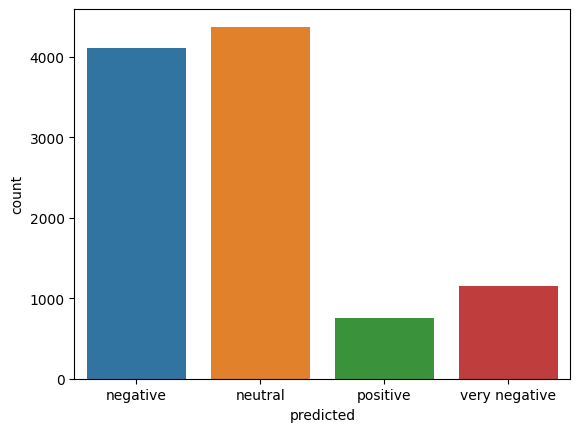

In [ ]:
sns.countplot(x = 'predicted', data = df, hue = 'predicted')
plt.show()

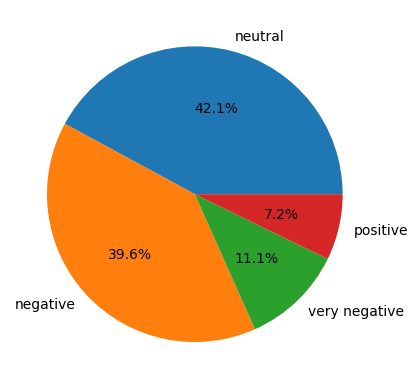

In [ ]:
plt.pie(df['predicted'].value_counts(), labels = df['predicted'].value_counts().index, autopct = '%1.1f%%')
plt.show()

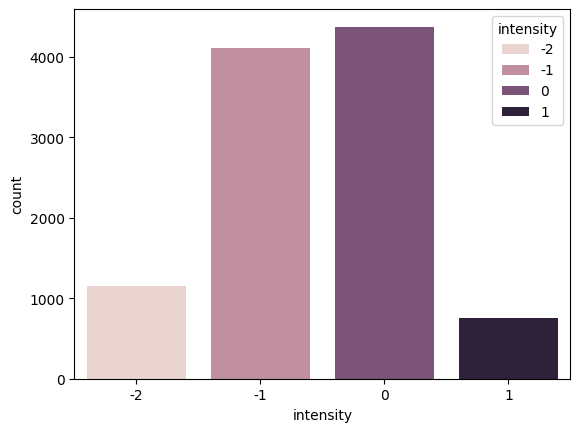

In [ ]:
sns.countplot(x = 'intensity', data = df, hue = 'intensity')
plt.show()

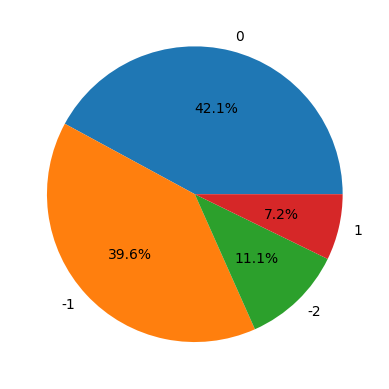

In [ ]:
plt.pie(df['intensity'].value_counts(), labels = df['intensity'].value_counts().index, autopct = '%1.1f%%')
plt.show()

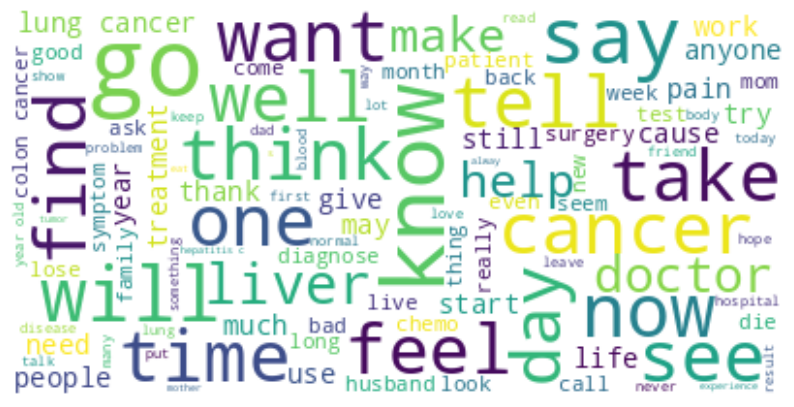

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['posts'].values)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from tqdm import tqdm
from bs4 import BeautifulSoup
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

cleaned_text = []

for sentence in tqdm(df['posts'].values):
  sentence = BeautifulSoup(sentence, 'html.parser').get_text()
  sentence = re.sub(r'http\S+|www\S+|https\S+', '', sentence, flags=re.MULTILINE)
  sentence = re.sub(r'[^a-zA-Z]', ' ', sentence)
  sentence = sentence.lower().strip()
  sentence_words = nltk.word_tokenize(sentence)
  sentence_words = [word for word in sentence_words if word not in string.punctuation]
  stop_words = set(stopwords.words('english'))
  filtered_words = [word for word in sentence_words if word not in stop_words]
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
  cleaned_text.append(' '.join(lemmatized_words))


100%|██████████| 10391/10391 [00:23<00:00, 446.32it/s]


In [ ]:
df['text'] = cleaned_text

df = df[['text', 'predicted']]
df.head()

,text,predicted
0,know parent child syndrome hear child high ris...,negative
1,heart know future promise article regardless h...,neutral
2,mylefibrosis turn leukemia want stem cell tran...,negative
3,one health group subject wayne dyer leukemia c...,neutral
4,gmos link leukemia http nsnbc gmo link leukemi...,neutral


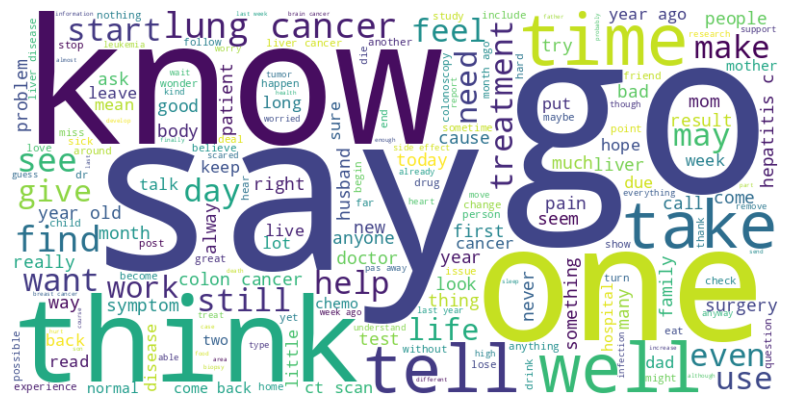

In [ ]:
text_data = ' '.join(df['text'])
word_cloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1200)
X = vectorizer.fit_transform(cleaned_text).toarray()
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.080501,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.182691
1,0.0,0.0,0.0,0.0,0.030086,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.016274,0.0,0.0,0.0,0.03147,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.053646,0.0,0.0,0.0,0.00000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.071425,0.0,0.0,0.034625,0.0,0.0,0.0,0.00000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.000000


In [ ]:
df['predicted'].value_counts()

,count
predicted,
neutral,4374
negative,4112
very negative,1155
positive,750


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['predicted'] = le.fit_transform(df['predicted'])
df.head()

,text,predicted
0,know parent child syndrome hear child high ris...,0
1,heart know future promise article regardless h...,1
2,mylefibrosis turn leukemia want stem cell tran...,0
3,one health group subject wayne dyer leukemia c...,1
4,gmos link leukemia http nsnbc gmo link leukemi...,1


In [ ]:
df['predicted'].value_counts()

,count
predicted,
1,4374
0,4112
3,1155
2,750


In [ ]:
y = df['predicted']
y

,predicted
0,0
1,1
2,0
3,1
4,1
...,...
10387,0
10388,3
10389,1
10390,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

def train_evaluate_models(x_train, x_test, y_train, y_test):
    models = {
        "Naive Bayes": MultinomialNB(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "AdaBoost": AdaBoostClassifier(),
        "Random Forest": RandomForestClassifier()
    }

    results = []

    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred_train = model.predict(x_train)
        y_pred = model.predict(x_test)

        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f"Model: {name}")
        print("Training Accuracy:", train_accuracy)
        print("Accuracy:", test_accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        print("Classification Report: ")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix: ")
        print(confusion_matrix(y_test, y_pred))
        results.append([name, train_accuracy, test_accuracy, precision, recall, f1])

    results_df = pd.DataFrame(results, columns=["Model", "Training Accuracy", "Test Accuracy", "Precision", "Recall", "F1 Score"])
    return results_df

In [ ]:
train_evaluate_models(X_train, X_test, y_train, y_test)

Model: Naive Bayes
Training Accuracy: 0.6906197869883228
Accuracy: 0.6635873749037722
Precision: 0.6887747256837027
Recall: 0.6635873749037722
F1 Score: 0.6426970910306131
Classification Report: 
              precision    recall  f1-score   support

           0       0.58      0.85      0.69      1028
           1       0.83      0.63      0.72      1094
           2       0.55      0.03      0.06       187
           3       0.64      0.52      0.57       289

    accuracy                           0.66      2598
   macro avg       0.65      0.51      0.51      2598
weighted avg       0.69      0.66      0.64      2598

Confusion Matrix: 
[[877  98   2  51]
 [388 690   3  13]
 [121  38   6  22]
 [135   3   0 151]]
Model: Gradient Boosting
Training Accuracy: 0.8212498395996407
Accuracy: 0.7086220169361047
Precision: 0.702486753045474
Recall: 0.7086220169361047
F1 Score: 0.6961160407244127
Classification Report: 
              precision    recall  f1-score   support

           0     

,Model,Training Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.690620,0.663587,0.688775,0.663587,0.642697
1,Gradient Boosting,0.821250,0.708622,0.702487,0.708622,0.696116
2,AdaBoost,0.602720,0.592764,0.629694,0.592764,0.568227
3,Random Forest,0.998204,0.680139,0.705507,0.680139,0.651765
